# Introduction to Python  

### Introduction to Scraping

In [1]:
#import pylab
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import urllib
from bs4 import BeautifulSoup as bs

%matplotlib inline
#%matplotlib notebook

### Scraping HTML tables with Pandas

In [2]:
url1="https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Austria"
list_df_tables = pd.read_html(url1)
len(list_df_tables)

12

In [77]:
list_df_tables[0].head()

Rank       Name Population                            State
  Rank       Name       1991     2001  2015[1]          State
0  1.0     Vienna    1539848  1550123  1840573         Vienna
1  2.0       Graz     237810   226244   273838         Styria
2  3.0       Linz     203044   183504   198181  Upper Austria
3  4.0   Salzburg     143978   142662   148420       Salzburg
4  5.0  Innsbruck     118112   113392   126851          Tyrol

In [4]:
list_df_tables[2].head()

,Federal state,Community Name,Status,Population
0,Burgenland,Andau,Market town,2285
1,Burgenland,Antau,Other municipality,758
2,Burgenland,Apetlon,Market town,1760
3,Burgenland,Bad Sauerbrunn,Other municipality,2219
4,Burgenland,Bad Tatzmannsdorf,Other municipality,1554


### Scraping using [Requests](https://docs.python-requests.org/en/master/)

In [79]:
url2 = 'https://www.wienerzeitung.at/nachrichten/politik/oesterreich/2107909-Haertere-steirische-Impfanreize.html' 
content = requests.get(url2)
print(content.status_code)

200


Check [HTTP status codes](https://developer.mozilla.org/pt-BR/docs/Web/HTTP/Status) 

#### Getting html content of the page 

In [80]:
content.text[0:1000]

'<!DOCTYPE html>\n<html lang="de">\n<head>\n<meta charset="utf-8" />\n<meta http-equiv="cache-control" content="no-cache" />\n<meta http-equiv="pragma" content="no-cache" />\n<meta name="robots" content="index, follow, noarchive" />\n<meta name="content-language" content="de" />\n<meta name="description" content="Am Donnerstag ging es zwar &quot;nur&quot; um eine Impfkampagne. Der steirische Landeshauptmann Hermann Sch&uuml;tzenh&ouml;fer plant aber die Corona-Impfung als Voraussetzung bei Neueinstellung von Kindergartenpersonal." />\n<meta name="author" content="Martina Madner" />\n<meta name="copyright" content="Wiener Zeitung Online" />\n<meta property="og:type" content="article" />\n<meta property="og:title" content="Impfpflicht - H&auml;rtere steirische Impfanreize" />\n<meta property="og:description" content="Am Donnerstag ging es zwar &quot;nur&quot; um eine Impfkampagne. Der steirische Landeshauptmann Hermann Sch&uuml;tzenh&ouml;fer plant aber die Corona-Impfung als..." />\n<me

### Using [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [81]:
soup = bs(content.text,'lxml')
print(type(soup))

<class 'bs4.BeautifulSoup'>


#### Getting formatted html content of the page 

In [82]:
print(soup.prettify()[0:1000])

<!DOCTYPE html>
<html lang="de">
 <head>
  <meta charset="utf-8"/>
  <meta content="no-cache" http-equiv="cache-control"/>
  <meta content="no-cache" http-equiv="pragma"/>
  <meta content="index, follow, noarchive" name="robots"/>
  <meta content="de" name="content-language"/>
  <meta content='Am Donnerstag ging es zwar "nur" um eine Impfkampagne. Der steirische Landeshauptmann Hermann Schützenhöfer plant aber die Corona-Impfung als Voraussetzung bei Neueinstellung von Kindergartenpersonal.' name="description"/>
  <meta content="Martina Madner" name="author"/>
  <meta content="Wiener Zeitung Online" name="copyright"/>
  <meta content="article" property="og:type"/>
  <meta content="Impfpflicht - Härtere steirische Impfanreize" property="og:title"/>
  <meta content='Am Donnerstag ging es zwar "nur" um eine Impfkampagne. Der steirische Landeshauptmann Hermann Schützenhöfer plant aber die Corona-Impfung als...' property="og:description"/>
  <meta content="Österreich Politik - Nachrichten -

#### Getting text of the page 

In [84]:
print(soup.get_text()[9000:10000])

ete Werbekampagne f&uuml;rs Impfen in der Steiermark. Es spricht von einer \"gewissen Impfm&uuml;digkeit, die eingetreten ist, da rede ich nicht um den hei&szlig;en Brei herum: Die Anmeldungen sind zur&uuml;ckgegangen.\" 560.000 von 1,1 Millionen impfbaren Steirerinnen und Steirern sind erstgeimpft, 227.000 auch ein zweites Mal. Sein Appell: \"Wir werden alles versuchen, damit sich die Menschen impfen lassen. Es ist noch nicht vorbei.\"<\/p>\n<p>In der ORF-\"Pressestunde\" sprach Sch&uuml;tzenh&ouml;fer von einem \"sch&auml;bigem Verhalten\" der Impfunwilligen. Auf die Frage, ob er sich eine Sars-CoV-2-Schutzimpfungspflicht f&uuml;r das Kindergartenpersonal vorstellen k&ouml;nne, sagte er: \"Ich w&auml;re pers&ouml;nlich daf&uuml;r, der Verfassungsdienst des Bundes sagt aber: Nein, das geht nicht\" - und lie&szlig; dann aufhorchen: \"Aber: Jedes Land kann selber etwas bei der Aufnahme tun. Das will ich in den Bereichen des Landes selbstverst&auml;ndlich so machen.\"<\/p>\n<p>Impfnachz&

In [85]:
print(soup.title)

<title>Impfpflicht - Härtere steirische Impfanreize - Wiener Zeitung Online</title>


#### Extracting anchors and links

In [86]:
soup.find_all('a')[0:20]

[<a href="/abonnement">Abo</a>,
 <a href="/epaper" target="extern">E-Paper</a>,
 <a href="/beilagen">Magazine</a>,
 <a href="/">
 <i class="fal fa-history fa-lg fa-fw"></i><span class="notification-counter meldung-counter"></span>
 </a>,
 <a class="mobile-search-button mobile-search-closed" data-overlay="overlay-search" href="javascript:void(0);" title="Suche"><i class="far fa-search"></i></a>,
 <a class="logo-wzo" href="/" itemprop="url" title="">
 <img alt="Wiener Zeitung" height="30" src="/_em_daten/wzo/assets/img/WZ-Logo.svg"/>
 <img class="hidden" height="0" itemprop="logo" src="/_em_daten/wzo/assets/img/favicons/wzo-512.png"/>
 </a>,
 <a class="mobile-menu-button" href="javascript:void(0);" title="Hauptmenü"><i class="far fa-bars"></i></a>,
 <a data-preview="" data-preview-count="4" href="https://www.wienerzeitung.at/nachrichten/politik/" target="_top" title="Politik">Politik</a>,
 <a data-preview="" data-preview-count="4" href="https://www.wienerzeitung.at/nachrichten/kultur/" t

#### Extracting only the *href* of anchors and links

In [97]:
for link in soup.find_all('a')[0:10]:
    print(link.get('href'))
    #print(link.text)

/abonnement
/epaper
/beilagen
/
javascript:void(0);
/
javascript:void(0);
https://www.wienerzeitung.at/nachrichten/politik/
https://www.wienerzeitung.at/nachrichten/kultur/
https://www.wienerzeitung.at/nachrichten/wirtschaft/


#### Extracting only *http* and *https* from *href* links

In [13]:
for link in soup.findAll('a', attrs={'href': re.compile("^http[s]?://")}):
    print(link.get('href'))

https://www.wienerzeitung.at/nachrichten/politik/
https://www.wienerzeitung.at/nachrichten/kultur/
https://www.wienerzeitung.at/nachrichten/wirtschaft/
https://www.wienerzeitung.at/amtsblatt/aktuelle-ausgabe/
https://www.wienerzeitung.at/dossiers/
https://www.wienerzeitung.at/meinung/
https://www.wienerzeitung.at/nachrichten/politik/
https://www.wienerzeitung.at/nachrichten/politik/
https://www.wienerzeitung.at/nachrichten/wirtschaft/
https://www.wienerzeitung.at/nachrichten/kultur/
https://www.wienerzeitung.at/nachrichten/chronik/
https://www.wienerzeitung.at/nachrichten/wissen/
https://www.wienerzeitung.at/nachrichten/sport/
https://www.wienerzeitung.at/nachrichten/wahlen/
https://www.wienerzeitung.at/nachrichten/zeitreisen-rubriken/
https://www.wienerzeitung.at/nachrichten/reflexionen/
https://www.wienerzeitung.at/nachrichten/digital/
https://www.wienerzeitung.at/amtsblatt/aktuelle-ausgabe/
https://www.wienerzeitung.at/amtsblatt/amtliche-veroeffentlichungen-zu-corona/
https://www.wi

### Which one to use: [urllib or requests?](https://stackoverflow.com/questions/2018026/what-are-the-differences-between-the-urllib-urllib2-urllib3-and-requests-modul)

### Creating a small generic function to extract links:

In [98]:
def getLinks(url):
    raw_page = requests.get(url)
    html_page = raw_page.text
    #html_page = urllib.request.urlopen(url)
    soup = bs(html_page)
    links = []
    for link in soup.findAll('a', attrs={'href': re.compile("^http[s]?://")}):
        links.append(link.get('href'))
    return links

print(getLinks("https://arstechnica.com"))

['https://arstechnica.com', 'http://video.arstechnica.com/', 'http://arstechnica.com/?view=grid', 'http://arstechnica.com/?view=archive', 'http://arstechnica.com/?theme=light', 'http://arstechnica.com/?theme=dark', 'https://arstechnica.com/civis/ucp.php?mode=login&return_to=%2F', 'https://arstechnica.com/civis/ucp.php?mode=register', 'https://arstechnica.com/gadgets/2021/06/rtx-3070-ti-review-nvidia-has-flipped-its-turn-signal-out-of-the-gpu-fast-lane/', 'https://arstechnica.com/gadgets/2021/06/rtx-3070-ti-review-nvidia-has-flipped-its-turn-signal-out-of-the-gpu-fast-lane/', 'https://arstechnica.com/gadgets/2021/06/rtx-3070-ti-review-nvidia-has-flipped-its-turn-signal-out-of-the-gpu-fast-lane/', 'https://arstechnica.com/author/samred/', 'https://arstechnica.com/gadgets/2021/06/rtx-3070-ti-review-nvidia-has-flipped-its-turn-signal-out-of-the-gpu-fast-lane/?comments=1', 'https://arstechnica.com/tech-policy/2021/06/some-people-cant-get-fcc-subsidy-because-street-isnt-the-same-as-st/', 'ht

article### Extracting specific information

In [99]:
url3 = 'https://thegreenestworkforce.ca/index.php/en/schools/' 
content = requests.get(url3).text
soup = bs(content,'lxml')

In [100]:
soup.get_text()[0:4000]

'\n\n\nA complete list of Canadian Universities and Colleges - The Greenest Workforce : The Greenest Workforce\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nif(typeof stLight != "undefined" ){\n\tstLight.options({\n\t\tpublisher: "df7e08d0-fa61-487f-be1c-0db70716d1aa",\n\t\tsnapsets:false,\n\t\tservicePopup:true,\n\t\tonhover: false\n\t\t}); \n\t//stLight.options({snapsets:false});\n}\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n{"@context":"https://schema.org","@graph":[{"@type":"WebSite","@id":"http://thegreenestworkforce.ca/index.php/en/home/#website","url":"http://thegreenestworkforce.ca/index.php/en/home/","name":"The Greenest Workforce","description":"","potentialAction":[{"@type":"SearchAction","target":"http://thegreenestworkforce.ca/index.php/en/home/?s={search_term_string}","query-input":"required name=search_term_string"}],"inLanguage":"en-CA"},{"@type":"WebPage","@id":"https://thegreenestworkforce.ca/index.php/en/schools/#webpage","url":"https://thegreenestworkforce.ca/index.php/en/schools/","nam

#### Inspect page source code

In [101]:
My_table = soup.find('article',{'id':'post-17896'})

In [102]:
My_table.contents[0:10]

['\n',
 <h2>Universities</h2>,
 '\n',
 <h3>British Columbia</h3>,
 '\n',
 <p><a href="http://www.viu.ca/" target="_blank" title="Vancouver Island University">Vancouver Island University</a><br/>
 <a href="http://www.royalroads.ca/" target="_blank" title="Royal Roads University">Royal Roads University</a><br/>
 <a href="http://www.sfu.ca/" target="_blank" title="Simon Fraser University">Simon Fraser University</a><br/>
 <a href="https://www.twu.ca/" target="_blank" title="Trinity Western University">Trinity Western University</a><br/>
 <a href="http://www.tru.ca/" target="_blank" title="Thompson River University">Thompson River University</a><br/>
 <a href="http://www.ufv.ca/" target="_blank" title="University of the Fraser Valley">University of the Fraser Valley</a><br/>
 <a href="http://www.ubc.ca/" target="_blank" title="University of British Columbia">University of British Columbia</a><br/>
 <a href="http://www.unbc.ca/" target="_blank" title="University of Northern British Columbia

In [103]:
links = My_table.findAll('a')
links[0:10]

[<a href="http://www.viu.ca/" target="_blank" title="Vancouver Island University">Vancouver Island University</a>,
 <a href="http://www.royalroads.ca/" target="_blank" title="Royal Roads University">Royal Roads University</a>,
 <a href="http://www.sfu.ca/" target="_blank" title="Simon Fraser University">Simon Fraser University</a>,
 <a href="https://www.twu.ca/" target="_blank" title="Trinity Western University">Trinity Western University</a>,
 <a href="http://www.tru.ca/" target="_blank" title="Thompson River University">Thompson River University</a>,
 <a href="http://www.ufv.ca/" target="_blank" title="University of the Fraser Valley">University of the Fraser Valley</a>,
 <a href="http://www.ubc.ca/" target="_blank" title="University of British Columbia">University of British Columbia</a>,
 <a href="http://www.unbc.ca/" target="_blank" title="University of Northern British Columbia">University of Northern British Columbia</a>,
 <a href="http://www.uvic.ca/" target="_blank" title="Uni

In [104]:
colleges = []
for link in links:
    colleges.append(link.get('href'))
    
print(colleges)

['http://www.viu.ca/', 'http://www.royalroads.ca/', 'http://www.sfu.ca/', 'https://www.twu.ca/', 'http://www.tru.ca/', 'http://www.ufv.ca/', 'http://www.ubc.ca/', 'http://www.unbc.ca/', 'http://www.uvic.ca/', 'http://www.fnuniv.ca/', 'http://www.uregina.ca/', 'http://www.usask.ca/', 'http://www.athabascau.ca/', 'http://www.augustana.ualberta.ca/', 'http://concordia.ab.ca/', 'http://www.kingsu.ca/', 'http://www.ualberta.ca/', 'http://www.ucalgary.ca/', 'http://www.uleth.ca/', 'http://www.macewan.ca/wcm/index.htm', 'http://www.mtroyal.ca/', 'http://www.brandonu.ca/', 'http://umanitoba.ca/', 'http://www.uwinnipeg.ca/', 'http://www.cmu.ca/', 'http://umanitoba.ca/stpauls/', 'http://ustboniface.ca/', 'http://www.algomau.ca/', 'http://brescia.uwo.ca/', 'http://www.brocku.ca/', 'http://carleton.ca/', 'http://www.dominicanu.ca/', 'http://www.huronuc.on.ca/Home', 'http://www.kings.uwo.ca/', 'https://www.lakeheadu.ca/', 'http://laurentian.ca/', 'http://www.mcmaster.ca/', 'http://www.nipissingu.ca

In [105]:
df = pd.DataFrame()
df['University'] = colleges
df.head()

,University
0,http://www.viu.ca/
1,http://www.royalroads.ca/
2,http://www.sfu.ca/
3,https://www.twu.ca/
4,http://www.tru.ca/


### Requests with Parameters

[Example](https://towardsdatascience.com/web-scraping-101-in-python-35f8653b1c97) of using [parameters with *requests*](https://docs.python-requests.org/en/master/user/quickstart/) on [IMDB](https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating):

After taking a look at the IMDB webpage, we’ll set out to extract (all highlighted in the above screenshot of the page):

+ Movie title
+ Release year
+ Runtime
+ Audience rating
+ Genre
+ IMDB rating
+ Number of votes
+ Box office earnings
+ Director
+ Primary actors

In [106]:
url4 = 'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'

def get_page_contents(url):
    page = requests.get(url, headers={"Accept-Language": "en-US"})
    return bs(page.text, "html.parser")

soup = get_page_contents(url4)

Extracting text: Movie titles and release year

Since we’ve already located the HTML tag containing each movie card, we can get a list of all distinct movies and their corresponding HTML by:

In [107]:
movies = soup.findAll('h3', class_='lister-item-header')
movies[0:5]

[<h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt0111161/">The Shawshank Redemption</a>
 <span class="lister-item-year text-muted unbold">(1994)</span>
 </h3>,
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">2.</span>
 <a href="/title/tt0068646/">The Godfather</a>
 <span class="lister-item-year text-muted unbold">(1972)</span>
 </h3>,
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">3.</span>
 <a href="/title/tt10189514/">Soorarai Pottru</a>
 <span class="lister-item-year text-muted unbold">(2020)</span>
 </h3>,
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">4.</span>
 <a href="/title/tt0468569/">The Dark Knight</a>
 <span class="lister-item-year text-muted unbold">(2008)</span>
 </h3>,
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">5.</span>
 <a href="/title/tt0071562/"

The findAll method creates a list where each entry contains the HTML that’s captured within the h3 tag and list-item-header class.  
By taking a deeper look at the first movies HTML and see that the movie title can be found under the first a tag.

To capture this attribute we can loop through all movies and either call findAll and grab the first element of the list, or we can use the find method which automatically grabs the first tag it finds. Thus, we can construct a list of all movie titles (with a little help from list comprehensions for efficiency) through:

In [108]:
titles = [movie.find('a').text for movie in movies]
titles[0:10]

['The Shawshank Redemption',
 'The Godfather',
 'Soorarai Pottru',
 'The Dark Knight',
 'The Godfather: Part II',
 '12 Angry Men',
 'The Lord of the Rings: The Return of the King',
 'Pulp Fiction',
 "Schindler's List",
 'Inception']

Release years can be found under the tag span and class lister-item-year text-muted unbold. To grab these, we can follow a similar approach as before:

In [109]:
release = [movie.find('span', class_='lister-item-year text-muted unbold').text for movie in movies]
release[0:10]

['(1994)',
 '(1972)',
 '(2020)',
 '(2008)',
 '(1974)',
 '(1957)',
 '(2003)',
 '(1994)',
 '(1993)',
 '(2010)']

Extracting Numerical Values:

In the case of IMDB ratings, number of votes and box office earnings we can see that while these may be available as string values, can also grab the actual numerical values from the data-value attribute within each respective tag.

Here’s the IMDB rating of The Godfather:  
\<div class="inline-block ratings-imdb-rating" name="ir" data-value="9.2">

In [26]:
soup.find('div', class_='inline-block ratings-imdb-rating')['data-value']

'9.3'

In the case of number of votes and earnings we don’t have a class attribute to filter for. Here are the number of votes and estimated box office earnings:

In [27]:
votes_earnings = soup.findAll('span', {'name':'nv'})
print([ve['data-value'] for ve in votes_earnings])

['2404057', '28,341,469', '1664187', '134,966,411', '82317', '2364103', '534,858,444', '1156483', '57,300,000', '708658', '4,360,000', '1677032', '377,845,905', '1868122', '107,928,762', '1239852', '96,898,818', '2121603', '292,576,195', '1898194', '37,030,102', '1697864', '315,544,750', '1857924', '330,252,182', '702227', '6,100,000', '26531', '1516385', '342,551,365', '1715841', '171,479,930', '1046031', '46,836,394', '1181890', '290,475,067', '935674', '112,000,000', '616592', '53,367,844', '1566414', '188,020,017', '710849', '7,563,397', '673653', '10,055,859', '1266411', '216,540,909', '1177221', '136,801,374', '638535', '57,598,247', '1481893', '100,125,643', '1302569', '130,742,922', '1253912', '322,740,140', '45502', '25607', '536,364', '322211', '269,061', '413454', '30747', '742248', '13,092,000', '780749', '13,182,281', '1219542', '53,089,891', '1216552', '132,384,315', '751501', '32,572,577', '1370694', '187,705,427', '1051520', '6,719,864', '1010052', '23,341,568', '105932

In [28]:
votes = []
earnings = []
idx = 0
while idx < len(votes_earnings)-1:
    votes.append(votes_earnings[idx]['data-value'])
    earnings.append(votes_earnings[idx+1]['data-value'])
    idx+=2
print(votes[0:5])
print(earnings[0:5])

['2404057', '1664187', '82317', '534,858,444', '57,300,000']
['28,341,469', '134,966,411', '2364103', '1156483', '708658']


Nested Values

In the case where the data we need is located within multiple levels of generic tags, we’ll need to dig into this nested structure to extract what we need.

In the case of the movie directors and actors we’ll need to do just that. From inspecting the HTML we see that the director information is located within an initial p tag and thereafter an a tag — both without class attributes making it necessary to unnest the data. We’ll do this by calling find and findAll repeatedly.

Since the director is the 1st a tag, we can extract this information through:

In [29]:
for l1 in soup.findAll('p')[0:10]:
    if l1.find('a'):
        print('---')
        for l2 in l1.findAll('a'):
            print(l2)
            print(l2.text)

---
<a href="/name/nm0001104/">Frank Darabont</a>
Frank Darabont
<a href="/name/nm0000209/">Tim Robbins</a>
Tim Robbins
<a href="/name/nm0000151/">Morgan Freeman</a>
Morgan Freeman
<a href="/name/nm0348409/">Bob Gunton</a>
Bob Gunton
<a href="/name/nm0006669/">William Sadler</a>
William Sadler
---
<a href="/name/nm0000338/">Francis Ford Coppola</a>
Francis Ford Coppola
<a href="/name/nm0000008/">Marlon Brando</a>
Marlon Brando
<a href="/name/nm0000199/">Al Pacino</a>
Al Pacino
<a href="/name/nm0001001/">James Caan</a>
James Caan
<a href="/name/nm0000473/">Diane Keaton</a>
Diane Keaton


In [30]:
actors = [actor.text for actor in soup.findAll('p')[2].findAll('a')]
actors

['Frank Darabont',
 'Tim Robbins',
 'Morgan Freeman',
 'Bob Gunton',
 'William Sadler']

#### Creating functions to automate information scraping on IMDB:

In [31]:
def numeric_value(movie, tag, class_=None, order=None):
    if order:
        if len(movie.findAll(tag, class_)) > 1:
            to_extract = movie.findAll(tag, class_)[order]['data-value']
        else:
            to_extract = None
    else:
        to_extract = movie.find(tag, class_)['data-value']

    return to_extract


def text_value(movie, tag, class_=None):
    if movie.find(tag, class_):
        return movie.find(tag, class_).text
    else:
        return


def nested_text_value(movie, tag_1, class_1, tag_2, class_2, order=None):
    if not order:
        return movie.find(tag_1, class_1).find(tag_2, class_2).text
    else:
        return [val.text for val in movie.find(tag_1, class_1).findAll(tag_2, class_2)[order]]


def extract_attribute(soup, tag_1, class_1='', tag_2='', class_2='',
                      text_attribute=True, order=None, nested=False):
    movies = soup.findAll('div', class_='lister-item-content')
    data_list = []
    for movie in movies:
        if text_attribute:
            if nested:
                data_list.append(nested_text_value(movie, tag_1, class_1, tag_2, class_2, order))
            else:
                data_list.append(text_value(movie, tag_1, class_1))
        else:
            data_list.append(numeric_value(movie, tag_1, class_1, order))

    return data_list

#### Creating a Dataframe with the information

In [32]:
titles = extract_attribute(soup, 'a')
release = extract_attribute(soup, 'span', 'lister-item-year text-muted unbold')
audience_rating = extract_attribute(soup, 'span', 'certificate')
runtime = extract_attribute(soup, 'span', 'runtime')
genre = extract_attribute(soup, 'span', 'genre')
imdb_rating = extract_attribute(soup, 'div', 'inline-block ratings-imdb-rating', False)
votes = extract_attribute(soup, 'span' , {'name' : 'nv'}, False, 0)
earnings = extract_attribute(soup, 'span' , {'name' : 'nv'}, False, 1)
directors = extract_attribute(soup, 'p', '', 'a', '', True, 0, True)
actors = extract_attribute(soup, 'p', '', 'a', '', True, slice(1, 5, None), True)


df_dict = {'Title': titles, 'Relase': release, 'Audience Rating': audience_rating,
           'Runtime': runtime, 'Genre': genre, 'IMDB Rating': imdb_rating,
           'Votes': votes, 'Box Office Earnings': earnings, 'Director': directors,
           'Actors': actors}

df = pd.DataFrame(df_dict)
df.head()

,Title,Relase,Audience Rating,Runtime,Genre,IMDB Rating,Votes,Box Office Earnings,Director,Actors
0,The Shawshank Redemption,(1994),R,142 min,\nDrama,\n\n9.3\n,"2,404,057","2,404,057",Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,The Godfather,(1972),R,175 min,"\nCrime, Drama",\n\n9.2\n,"1,664,187","1,664,187",Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
2,Soorarai Pottru,(2020),TV-MA,153 min,\nDrama,\n\n9.1\n,"82,317","82,317",Sudha Kongara,"[Madhavan, Suriya, Paresh Rawal, Aparna Balamu..."
3,The Dark Knight,(2008),PG-13,152 min,"\nAction, Crime, Drama",\n\n9.0\n,"2,364,103","2,364,103",Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
4,The Godfather: Part II,(1974),R,202 min,"\nCrime, Drama",\n\n9.0\n,"1,156,483","1,156,483",Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia..."


### Manually creating a Dataframe and starting analysis

In [33]:
url5 = "http://www.hubertiming.com/results/2017GPTR10K"
html = urllib.request.urlopen(url5)
soup = bs(html, 'lxml')

In [34]:
# Get the title
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [35]:
# Print out the text
text = soup.get_text()
text[0:200]

'\n\n\n\n\n\n\nRace results for the 2017 Intel Great Place to Run \\ Urban Clash Games!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n 2017 Intel Great Place to Run 10K \\ Urban Clash Games\n Hillsboro Stadium, Hillsboro, OR \n June 2nd,'

In [36]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><im

In [37]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [38]:
# Print the first 8 rows for sanity check
rows = soup.find_all('tr')
print(rows[:8])

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>5:51</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>5:55</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<

In [39]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>16:20</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [41]:
str_cells = str(row_td)
cleantext = bs(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 16:20, 1:42:10, ]


#### Now processing the whole page

In [42]:
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 16:20, 1:42:10, ]


str

In [43]:
df = pd.DataFrame(list_rows, columns=['raw'])
df.head(10)

,raw
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


### Cleaning the fields

In [44]:
df1 = df['raw'].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[],None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [45]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [46]:
col_labels = soup.find_all('th')

In [47]:
all_header = []
col_str = str(col_labels)
cleantext2 = bs(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gun Time, Team]']


In [48]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [49]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]


In [50]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]


In [51]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None


In [52]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      583 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Chip Pace  578 non-null    object
 8    Gun Time   578 non-null    object
 9    Team]      578 non-null    object
dtypes: object(10)
memory usage: 50.1+ KB


(583, 10)

In [53]:
df6 = df5.dropna(axis=0, how='any')

In [54]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [55]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [56]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [57]:
time_list = df7[' Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    try:
        h, m, s = i.split(':')
        math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    except:
        h, m = i.split(':')
        math = (int(h) * 3600 + int(m) * 60) # + int(s))/60
    time_mins.append(math)
#print(time_mins)

In [58]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team,Runner_mins
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,,130860.0
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...,132120.0
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,,135840.0
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,,138840.0
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...,141660.0


In [59]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,97617.157972
std,92975.700498
min,60.016667
25%,68.300000
50%,152580.000000
75%,186540.000000
max,215700.000000


In [60]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x7f0932d2da00>], [Text(1, 0, 'Runners')])

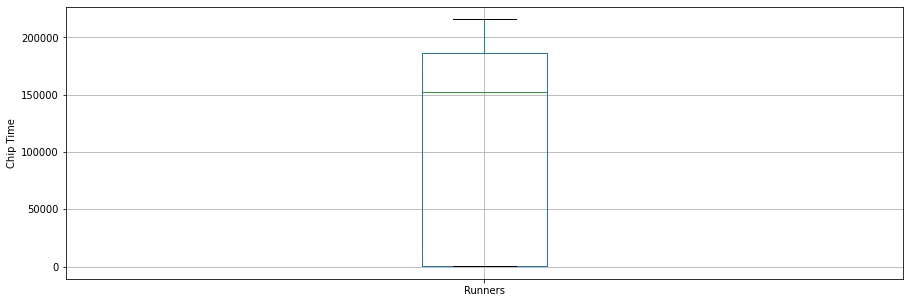

In [61]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

/home/rsouza/environments/default_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


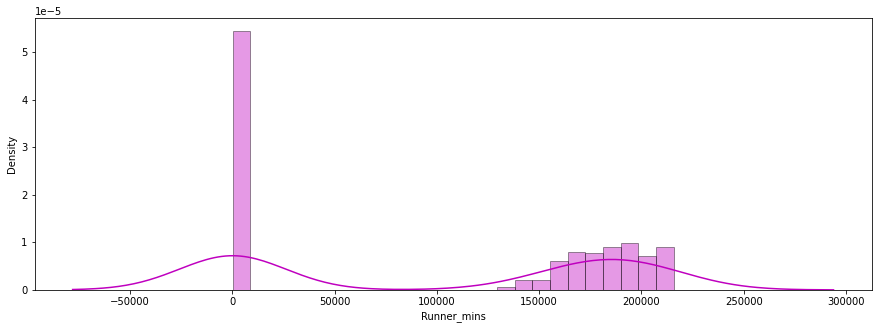

In [68]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

/home/rsouza/environments/default_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rsouza/environments/default_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


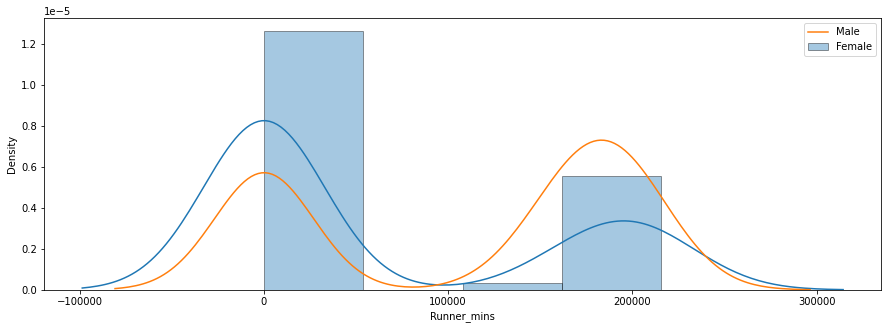

In [69]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [70]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                     \
              count           mean           std        min        25%   
 Gender                                                                  
 F            163.0   61844.168609  91100.389419  60.200000  66.550000   
 M            414.0  111701.692432  89982.758495  60.016667  69.320833   

                                            
                   50%       75%       max  
 Gender                                     
 F           75.216667  173280.0  215700.0  
 M       163320.000000  188745.0  215580.0  


Text(0.5, 0.98, '')

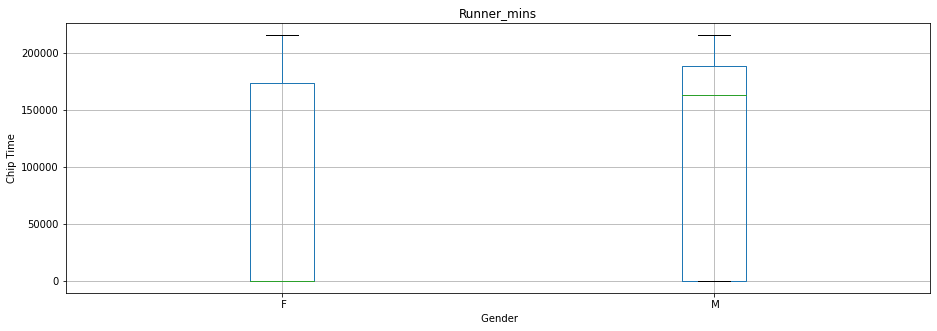

In [71]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")

## Now it is your turn:

In [ ]:
url = 'https://www.4icu.org/at/vienna/'